In [6]:
!pip install numpy pandas os seaborn matplotlib plotly

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [7]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
df=pd.read_csv("loan_data.csv")

In [16]:
#KEŞİFSEL VERİ ANALİZİ

def check_df(dataframe): #verisetinin özelliklerini göster
    print("-----------SHAPE--------")
    print(dataframe.shape) #satır ve sütun sayısı
    print("-----------COLUMNS---------")
    print(dataframe.columns) #sütun adlarını gösterir
    print("------------INFO------------")
    dataframe.info() #verisetinin temel bilgileri
    print("-------------TYPES-----------")
    print(dataframe.dtypes) #her sütunun veri türü
    print("-------------HEAD--------------")
    print(dataframe.head()) #baş kısım
    print("------------TAIL---------------")
    print(dataframe.tail()) #son birkaç satır
    print("-----------NA---------------")
    print(dataframe.isnull().sum())#eksik değerleri gösterir

In [17]:
check_df(df) #check_df fonksiyonu çağrılır

-----------SHAPE--------
(45000, 14)
-----------COLUMNS---------
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
------------INFO------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 no

In [18]:
print("--------SAMPLE----------")  #rastgele veri getirir
print(df.sample())

--------SAMPLE----------
       person_age person_gender person_education  person_income  \
16872        25.0        female           Master       145204.0   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
16872               0              MORTGAGE    10000.0   EDUCATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
16872          11.01                 0.07                         2.0   

       credit_score previous_loan_defaults_on_file  loan_status  
16872           673                            Yes            0  


In [19]:
df.describe() #sayısal sütunlara ilişkin istatistikler

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [35]:
import pandas as pd

def column_detection(dataframe: pd.DataFrame, cat_th: int=10, car_th: int=29):
    """
    Detects and categorizes columns in a pandas DataFrame.

    Args:
        dataframe: The input DataFrame.
        cat_th: Threshold for the maximum number of unique values 
                to consider a column as categorical.
        car_th: Threshold for the minimum number of unique values 
                to consider a column as cardinal.

    Returns:
        A tuple containing lists of categorical, numerical, 
        categorical-but-cardinal, and numerical-but-categorical columns.
    """

    cat_cols = dataframe.select_dtypes(include=['object', 'category']).columns.tolist() 
    num_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Identify potential categorical columns based on unique values
    potential_cat_cols = [col for col in num_cols if dataframe[col].nunique() <= cat_th] 

    # Remove potential categorical columns that are actually cardinal
    cat_cols.extend([col for col in potential_cat_cols if col not in dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()]) 

    # Identify cardinal columns
    cat_but_car = [col for col in cat_cols if dataframe[col].nunique() > car_th] 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identify numerical-but-categorical columns
    num_but_cat = [col for col in potential_cat_cols if col not in cat_cols]

    print("\n--------------CATEGORIC------------")
    print(cat_cols)
    print("\n--------------NUMERIC------------")
    print(num_cols)
    print("\n--------------CATEGORIC BUT CARDINAL------------")
    print(cat_but_car)
    print("\n--------------NUMERIC BUT CATEGORIC------------")
    print(num_but_cat)
    print("\n--------------COLUMNS OVERVIEW-----------------")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat



In [36]:
cat_cols,num_cols,cat_but_car,num_but_cat=column_detection(df)


--------------CATEGORIC------------
['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

--------------NUMERIC------------
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

--------------CATEGORIC BUT CARDINAL------------
[]

--------------NUMERIC BUT CATEGORIC------------
['loan_status']

--------------COLUMNS OVERVIEW-----------------
Observations: 45000
Variables: 14
cat_cols: 5
num_cols: 9
cat_but_car: 0
num_but_cat: 1


In [13]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


        person_gender      Ratio
male            24841  55.202222
female          20159  44.797778


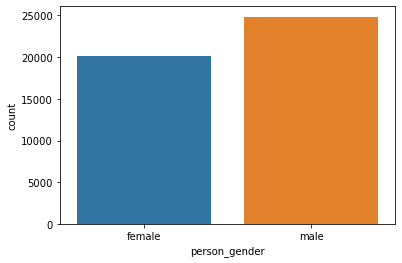

             person_education      Ratio
Bachelor                13399  29.775556
Associate               12028  26.728889
High School             11972  26.604444
Master                   6980  15.511111
Doctorate                 621   1.380000


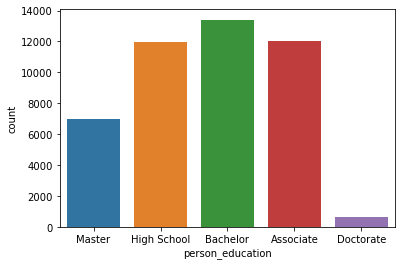

          person_home_ownership      Ratio
RENT                      23443  52.095556
MORTGAGE                  18489  41.086667
OWN                        2951   6.557778
OTHER                       117   0.260000


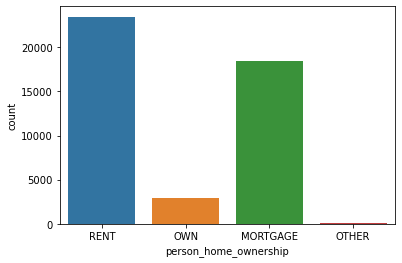

                   loan_intent      Ratio
EDUCATION                 9153  20.340000
MEDICAL                   8548  18.995556
VENTURE                   7819  17.375556
PERSONAL                  7552  16.782222
DEBTCONSOLIDATION         7145  15.877778
HOMEIMPROVEMENT           4783  10.628889


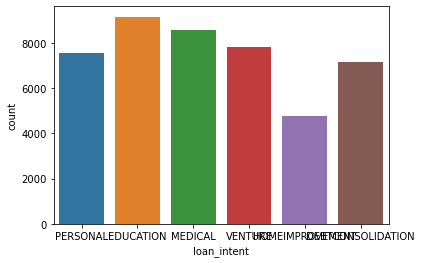

     previous_loan_defaults_on_file      Ratio
Yes                           22858  50.795556
No                            22142  49.204444


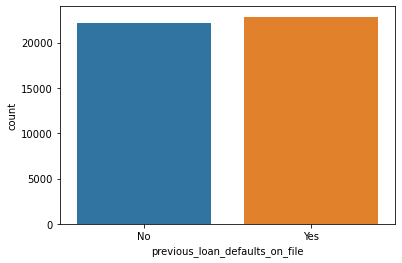

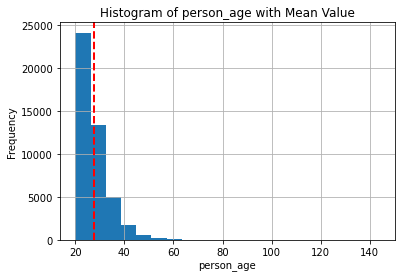

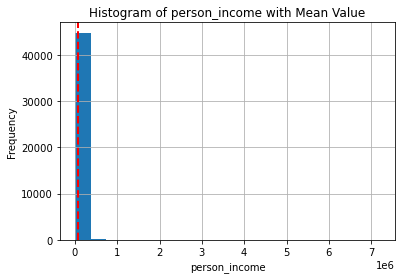

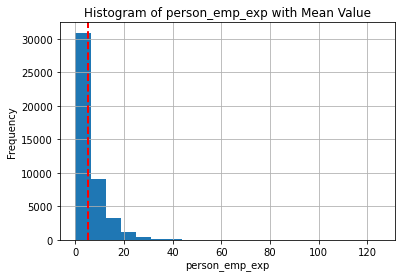

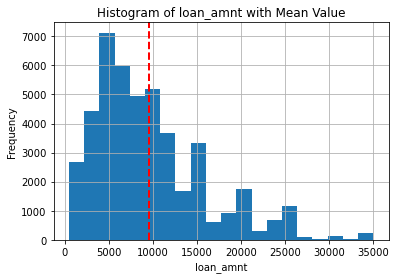

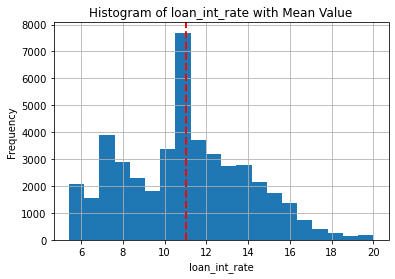

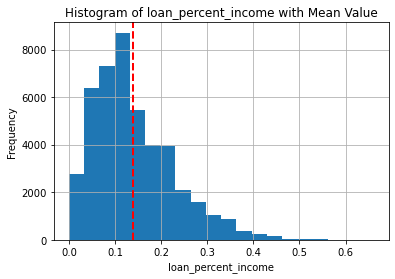

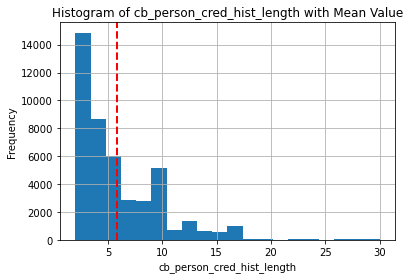

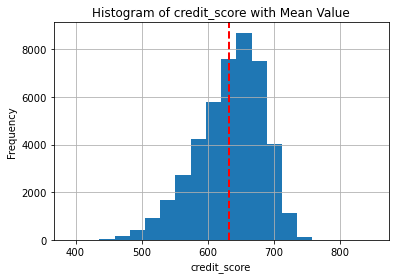

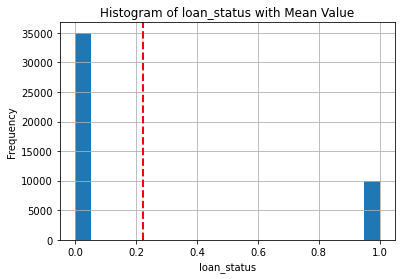

In [37]:
#Görselleştirme
def cat_summary(dataframe, col_name, plot=True):  #her bir kategoriye ait gözlem sayılarını ve bu sayıların toplam gözlem sayısına oranını 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                        "Ratio":100 * dataframe[col_name].value_counts()/len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)  #her bir kategorinin sıklığını görselleştirir.
        plt.show(block=True)
        
for col in cat_cols:
    cat_summary(df,col)
    
def hist_num_columns_show(dataframe,num_column):
    mean_value = dataframe[num_column].mean()
    dataframe[num_column].hist(bins=20)
    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)  #ortalama
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.title(f'Histogram of {num_column} with Mean Value')
    plt.show(block=True)
    
for num_col in num_cols:
    hist_num_columns_show(df,num_col)
    
    

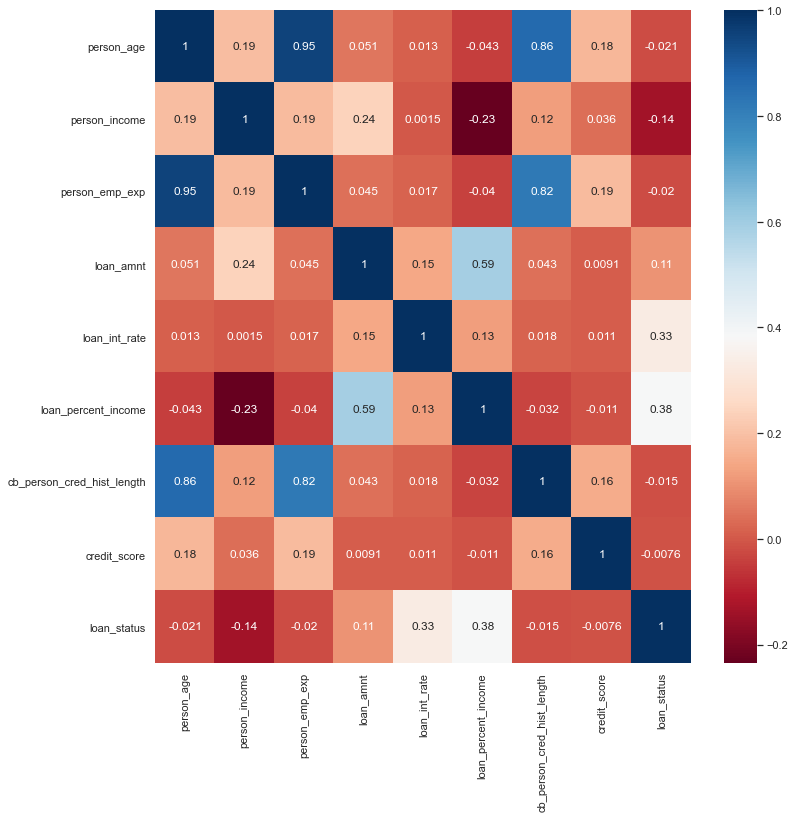

In [38]:
corr=df[num_cols].corr()
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,cmap="RdBu",annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

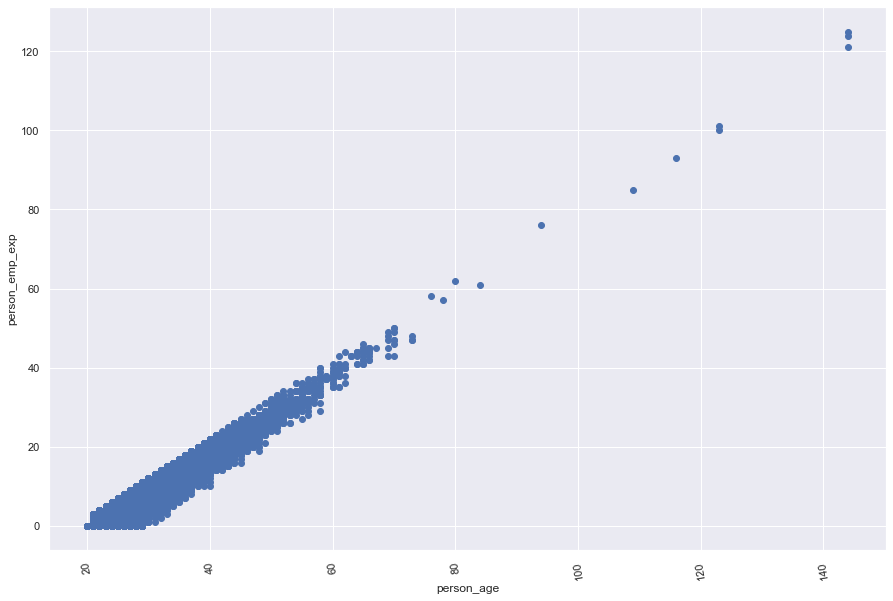

In [39]:
plt.figure(figsize=(15,10))
plt.scatter("person_age","person_emp_exp",data=df)
plt.xticks(rotation=100)
plt.xlabel("person_age")
plt.ylabel("person_emp_exp")
plt.show